<a href="https://colab.research.google.com/github/nakamura196/ndl_ocr/blob/main/gradio%E3%81%AEAPI%E5%88%A9%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 入力データ

In [13]:
url = "https://rmda.kulib.kyoto-u.ac.jp/iiif/RB00007030/01/RB00007030_00003_0.ptif/full/1024,/0/default.jpg"

# 推論処理

In [19]:
import torch
import base64
import os
import requests

def image_file_to_base64(file_path):
    with open(file_path, "rb") as image_file:
        data = base64.b64encode(image_file.read())

    return data.decode('utf-8')

# 拡張子の取得
ext = os.path.splitext(url)[1]

# 画像のダウンロード
path = f'test.{ext}'
# !rm $path
torch.hub.download_url_to_file(url, path)

# base64の取得
data = image_file_to_base64(path)


# 推論
uploadData = {
    "data": [f"data:image/{ext};base64,{data}"]
}
api = 'https://hf.space/embed/nakamura196/yolov5-ndl-layout/+/api/predict'
response = requests.post(api, json=uploadData).json()

0.00B [00:00, ?B/s]

# レスポンスの確認

{'average_duration': 0.2814040184020996,
 'data': [''],
 'duration': 0.2730216979980469}

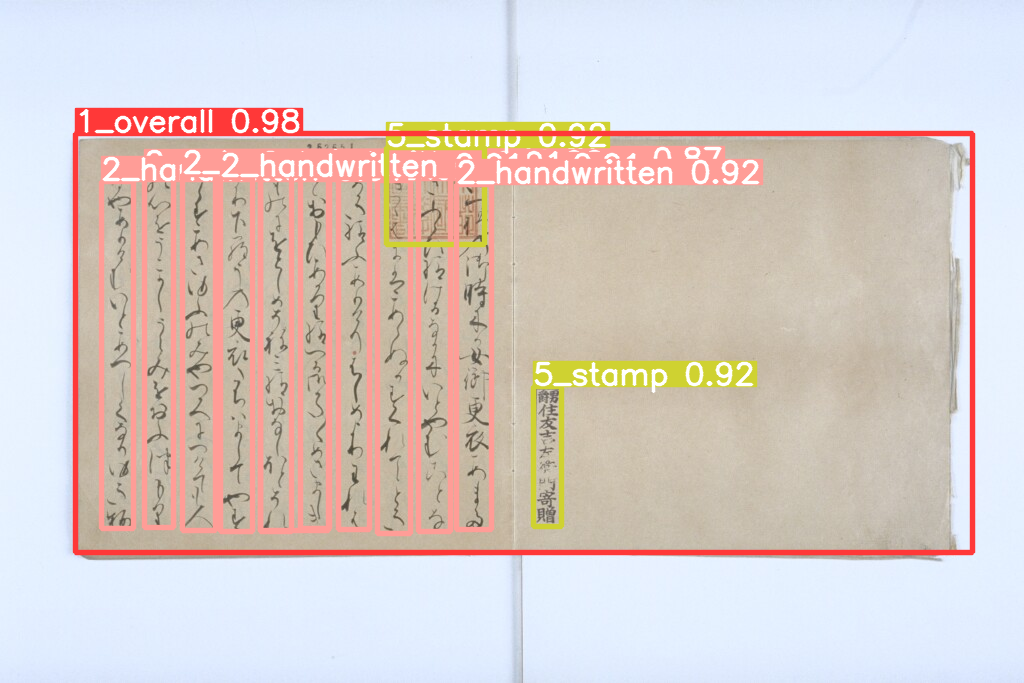

In [20]:
import pprint
pprint.pprint(response)

# 画像の表示


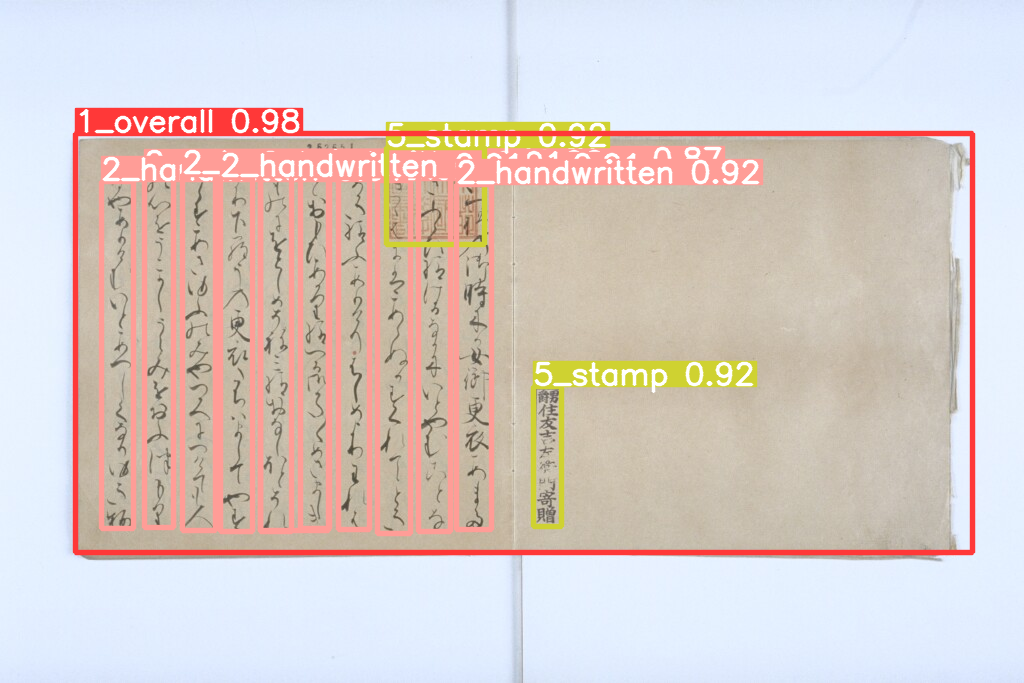

In [25]:
from IPython.display import HTML
data_url = response["data"][0]
HTML(f"""
<img height="400px" src="{data_url}"/>""")